<a href="https://colab.research.google.com/github/diperezbgit/2025_PROG101_UTEC/blob/main/CS8067%20-%20IA%20FUNDAMENTALS/10-05-2025/1_hill_climbing_teacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hill climbing search

![](https://drive.google.com/uc?export=view&id=1IlgFVvt98JrqeC7A1eracheX7oUHBx0E)

In [ ]:
import numpy as np

TSP = [
    [0,   200,  600,  100],
    [200,   0,  300,  100],
    [600, 300,  0,    400],
    [100, 100,  400,  0],
]

# Step 1
current_solution = np.array([0, 1, 2, 3])
np.random.shuffle(current_solution)

print(current_solution)

[3 0 2 1]


In [ ]:
def fitness(sol):
  distance = 0
  for i in range( len(sol) - 1 ):
    distance = distance + TSP[ sol[i]  ][ sol[i+1]  ]

  return distance

print( fitness(current_solution) )

1000


In [ ]:
def get_neighbors(sol):
  neighbors = []
  for i in range(len(sol) - 1):
    for j in range( i + 1, len(sol) ):
      new_sol = sol.copy()
      new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
      neighbors.append(new_sol)
  return neighbors

print( (current_solution) )
print( get_neighbors(current_solution) )

[3 0 2 1]
[array([0, 3, 2, 1]), array([2, 0, 3, 1]), array([1, 0, 2, 3]), array([3, 2, 0, 1]), array([3, 1, 2, 0]), array([3, 0, 1, 2])]


In [ ]:
def hill_climbing():
  # step 1: Solucion inicial
  current_solution = np.array([0, 1, 2, 3])
  np.random.shuffle(current_solution)

  while True:
    print("Iteration...")
    # step: generar vecinos
    neighbors = get_neighbors(current_solution)
    best_neighbor = min(neighbors, key=fitness)

    print("current_solution", current_solution)
    print("fitness current_solution", fitness(current_solution))
    print("neighbors", neighbors)
    print("best_neighbor", best_neighbor)
    print("fitness best_neighbor", fitness(best_neighbor))

    if fitness(best_neighbor) < fitness(current_solution):
      current_solution = best_neighbor
    else:
      return current_solution

    print("")

solution = hill_climbing()

print("\n 'good' solution:", solution)




Iteration...
current_solution [1 3 0 2]
fitness current_solution 800
neighbors [array([3, 1, 0, 2]), array([0, 3, 1, 2]), array([2, 3, 0, 1]), array([1, 0, 3, 2]), array([1, 2, 0, 3]), array([1, 3, 2, 0])]
best_neighbor [0 3 1 2]
fitness best_neighbor 500

Iteration...
current_solution [0 3 1 2]
fitness current_solution 500
neighbors [array([3, 0, 1, 2]), array([1, 3, 0, 2]), array([2, 3, 1, 0]), array([0, 1, 3, 2]), array([0, 2, 1, 3]), array([0, 3, 2, 1])]
best_neighbor [3 0 1 2]
fitness best_neighbor 600

 'good' solution: [0 3 1 2]


2

# HC con plot

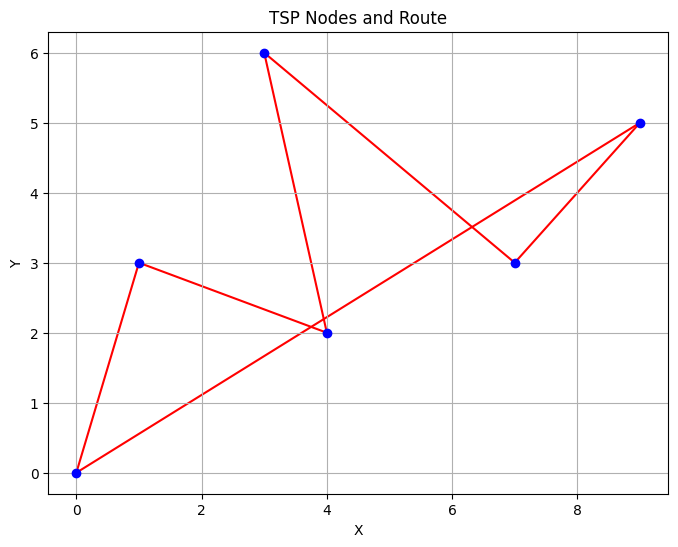

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

def plot_tsp(nodes, route):
    """
    Plot the TSP nodes and route.

    Parameters:
    - nodes: List of tuples containing the coordinates of each node.
    - route: List of node indices representing the TSP route.
    """
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', zorder=2)  # Plot nodes


    for i in range(len(route) - 1):
        node1 = route[i]
        node2 = route[i + 1]
        plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    # Connect the last node to the first node to form a loop
    node1 = route[-1]
    node2 = route[0]
    plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Nodes and Route')
    plt.grid(True)
    plt.show()

# Example usage:
nodes = [(0, 0), (1, 3), (4, 2), (3, 6), (7, 3), (9, 5)]  # Coordinates of nodes
route = [0, 1, 2, 3, 4, 5]  # Example TSP route (indices of nodes)

plot_tsp(nodes, route)

In [ ]:
N = 10 # cantidad de ciudades
positions = np.random.rand(N, 2) # generar las ciudades
distances = squareform(pdist(positions, 'euclidean')) # distancias entre ciudades

[[0.         0.37543795 0.63319361 0.20315121 0.17229386 0.14620817
  0.41621936 0.91555008 0.75262662 0.11843886]
 [0.37543795 0.         0.43767327 0.31948502 0.20319926 0.32154844
  0.5586175  0.87351292 0.4953125  0.32973809]
 [0.63319361 0.43767327 0.         0.70041497 0.51684591 0.67429933
  0.46386537 0.47585325 0.14889986 0.66640079]
 [0.20315121 0.31948502 0.70041497 0.         0.18784886 0.05699016
  0.59814786 1.05758555 0.79128727 0.08471795]
 [0.17229386 0.20319926 0.51684591 0.18784886 0.         0.15751477
  0.4463995  0.8735902  0.61752761 0.15211447]
 [0.14620817 0.32154844 0.67429933 0.05699016 0.15751477 0.
  0.54483916 1.01431386 0.77338518 0.02789032]
 [0.41621936 0.5586175  0.46386537 0.59814786 0.4463995  0.54483916
  0.         0.5351298  0.61276005 0.52069394]
 [0.91555008 0.87351292 0.47585325 1.05758555 0.8735902  1.01431386
  0.5351298  0.         0.54512856 0.99630838]
 [0.75262662 0.4953125  0.14889986 0.79128727 0.61752761 0.77338518
  0.61276005 0.54512

In [ ]:
def fitness(sol):
  distance = 0
  for i in range( len(sol) - 1 ):
    distance = distance + distances[ sol[i]  ][ sol[i+1]  ]

  return distance

print( fitness(current_solution) )

def get_neighbors(sol):
  neighbors = []
  for i in range(len(sol) - 1):
    for j in range( i + 1, len(sol) ):
      new_sol = sol.copy()
      new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
      neighbors.append(new_sol)
  return neighbors

1.2740180971811155


In [ ]:
range(N) -> (0, 1, 2, 3, .. N)

In [ ]:
def hill_climbing():
  # step 1: Solucion inicial
  current_solution = np.array([0, 1, 2, 3])
  np.random.shuffle(current_solution)

  while True:
    print("Iteration...")
    # step: generar vecinos
    neighbors = get_neighbors(current_solution)
    best_neighbor = min(neighbors, key=fitness)

    print("current_solution", current_solution)
    print("fitness current_solution", fitness(current_solution))
    print("neighbors", neighbors)
    print("best_neighbor", best_neighbor)
    print("fitness best_neighbor", fitness(best_neighbor))

    if fitness(best_neighbor) < fitness(current_solution):
      current_solution = best_neighbor
    else:
      return current_solution

    print("")

solution = hill_climbing()

print("\n 'good' solution:", solution)


